In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir = Path('/standard/BDShackathon/data')
id_mapping = pd.read_csv(dir/'leukemia'/'leukemia_ids.csv').set_index('ORIENAvatarKey')
id_mapping

,RNASeq,WES.tumor,WES.germline,WES.somatic
ORIENAvatarKey,,,,
A039956,FT.SA158775R,FT.SA158775D,FT.SA158742,TFT-SA158775D_NFT-SA158742
A039970,FT.SA158776R,FT.SA158776D,FT.SA158743,TFT-SA158776D_NFT-SA158743
A039973,FT.SA158769R,FT.SA158769D,FT.SA158735,TFT-SA158769D_NFT-SA158735
A039977,FT.SA158771R,FT.SA158771D,FT.SA158737,TFT-SA158771D_NFT-SA158737
A049227,FT.SA276601R,FT.SA276601D,FT.SA276583,TFT-SA276601D_NFT-SA276583
...,...,...,...,...
A049250,FT.SA276594R,FT.SA276594D,FT.SA276576,TFT-SA276594D_NFT-SA276576
A039962,FT.SA158754R,FT.SA158754D,FT.SA158733,TFT-SA158754D_NFT-SA158733
A039980,FT.SA158757R,FT.SA158757D,FT.SA158751,TFT-SA158757D_NFT-SA158751


In [3]:
def extract_count(patient):
    mapped_id = '-'.join(id_mapping.loc[patient, 'RNASeq'].split('.'))
    df = pd.read_csv(dir/'leukemia'/'molecular'/'rnaseq'/'genes'/f'{mapped_id}.genes.results', sep='\t')
    counts = df.set_index('gene_id')['expected_count'].round().astype(int).rename(patient)
    return counts

extract_count(id_mapping.index[0])

gene_id
ENSG00000000003.15       1
ENSG00000000005.6        0
ENSG00000000419.12    2022
ENSG00000000457.14     319
ENSG00000000460.17     182
                      ... 
ENSG00000288459.1        0
ENSG00000288460.1        0
ENSG00000288473.1       21
ENSG00000288484.1        0
ENSG00000288520.1        0
Name: A039956, Length: 60609, dtype: int64

In [11]:
df_raw = pd.DataFrame({patient: extract_count(patient) for patient in id_mapping.index}).T
df_raw

gene_id,ENSG00000000003.14,ENSG00000000003.15,ENSG00000000005.5,ENSG00000000005.6,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000457.14,ENSG00000000460.16,ENSG00000000460.17,ENSG00000000938.12,...,ENSG00000288393.1,ENSG00000288398.1,ENSG00000288434.1,ENSG00000288436.1,ENSG00000288437.1,ENSG00000288459.1,ENSG00000288460.1,ENSG00000288473.1,ENSG00000288484.1,ENSG00000288520.1
A039956,NaN,1.0,NaN,0.0,2022.0,NaN,319.0,NaN,182.0,NaN,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
A039970,NaN,0.0,NaN,0.0,1963.0,NaN,557.0,NaN,439.0,NaN,...,119.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,28.0
A039973,NaN,0.0,NaN,0.0,1752.0,NaN,360.0,NaN,84.0,NaN,...,123.0,5.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0
A039977,NaN,8.0,NaN,0.0,1588.0,NaN,479.0,NaN,286.0,NaN,...,148.0,5.0,0.0,7.0,0.0,0.0,0.0,6.0,0.0,109.0
A049227,NaN,0.0,NaN,0.0,152.0,NaN,51.0,NaN,35.0,NaN,...,10.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A049250,NaN,8.0,NaN,0.0,1451.0,NaN,1115.0,NaN,1120.0,NaN,...,1116.0,31.0,0.0,2.0,0.0,0.0,0.0,71.0,0.0,89.0
A039962,NaN,33.0,NaN,0.0,554.0,NaN,293.0,NaN,267.0,NaN,...,12.0,0.0,0.0,2.0,0.0,0.0,0.0,40.0,0.0,150.0
A039980,NaN,0.0,NaN,0.0,1450.0,NaN,72.0,NaN,139.0,NaN,...,34.0,12.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0
A040093,NaN,0.0,NaN,0.0,192.0,NaN,37.0,NaN,19.0,NaN,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
df = df_raw.dropna(axis=1, how='any')
df = df.loc[:, df.sum(axis=0) >= 10].astype(int)
df.to_csv('jamie-counts-raw.csv', sep=',')
df

gene_id,ENSG00000000419.12,ENSG00000000971.15,ENSG00000001167.14,ENSG00000001497.16,ENSG00000001626.15,ENSG00000001631.15,ENSG00000002079.14,ENSG00000002330.13,ENSG00000002549.12,ENSG00000002726.20,...,ENSG00000285970.1,ENSG00000285972.1,ENSG00000285974.1,ENSG00000285975.1,ENSG00000285978.1,ENSG00000285979.1,ENSG00000285990.1,ENSG00000285991.1,ENSG00000285992.1,ENSG00000285994.1
A039956,2022,248,721,1928,0,877,0,70,14195,0,...,6,0,0,0,0,0,0,0,0,0
A039970,1963,472,1089,2485,0,1163,2,57,5795,4,...,2,0,0,0,0,1,0,0,0,0
A039973,1752,97,816,1917,0,1099,0,76,1767,0,...,0,0,0,50,0,0,0,0,0,0
A039977,1588,271,1676,2695,8,969,10,85,11758,2,...,0,0,0,0,0,3,0,0,0,0
A049227,152,887,145,1954,0,106,0,27,1102,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A049250,1451,7627,2721,5675,0,3509,24,126,3422,24,...,5,2,0,0,0,22,0,0,0,9
A039962,554,991,849,2822,2,2242,0,27,989,7,...,15,0,0,0,0,1,0,0,0,0
A039980,1450,217,1438,1897,0,369,0,64,3599,30,...,6,0,0,0,0,0,0,0,0,0
A040093,192,114,77,1790,0,175,0,0,356,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
with open('rnaseq-gene-ids.csv', 'w') as f:
    f.writelines(f'{gene_id}\n' for gene_id in df.columns)

In [13]:
N = df.shape[0]
rng = np.random.default_rng(329)
conditions = np.concatenate([np.zeros((N//2,), dtype=int), np.ones(((N+1)//2,), dtype=int)])
rng.shuffle(conditions)
metadata = pd.DataFrame({'condition': conditions}, index=df.index)
metadata

,condition
A039956,0
A039970,0
A039973,0
A039977,0
A049227,0
...,...
A049250,1
A039962,0
A039980,1
A040093,1


In [14]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference

inference = DefaultInference(n_cpus=6)
dds = DeseqDataSet(
    counts = df,
    metadata = metadata,
    design = "~condition",
    inference = inference,
)

In [54]:
try:
    df_vst = pd.read_csv('jamie-counts-vst.csv').set_index('Unnamed: 0')
    df_vst.index.name = 'AvatarKey'
except FileNotFoundError:
    dds.vst()
    df_vst = pd.DataFrame(dds.layers['vst_counts'], index=df.index, columns=df.columns)
    df_vst.to_csv('jamie-counts-vst.csv', sep=',', index=True)
df_vst

,ENSG00000000419.12,ENSG00000000971.15,ENSG00000001167.14,ENSG00000001497.16,ENSG00000001626.15,ENSG00000001631.15,ENSG00000002079.14,ENSG00000002330.13,ENSG00000002549.12,ENSG00000002726.20,...,ENSG00000285970.1,ENSG00000285972.1,ENSG00000285974.1,ENSG00000285975.1,ENSG00000285978.1,ENSG00000285979.1,ENSG00000285990.1,ENSG00000285991.1,ENSG00000285992.1,ENSG00000285994.1
AvatarKey,,,,,,,,,,,,,,,,,,,,,
A039956,11.175348,8.185875,9.697337,11.106934,2.117353,9.977243,2.117353,6.463155,13.982231,2.117353,...,3.826579,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353
A039970,10.805558,8.771152,9.961086,11.144277,2.117353,10.055138,3.034812,5.908880,12.362681,3.394680,...,3.034812,2.117353,2.117353,2.117353,2.117353,2.771464,2.117353,2.117353,2.117353,2.117353
A039973,11.089903,7.008210,9.994094,11.219257,2.117353,10.420491,2.117353,6.681884,11.102153,2.117353,...,2.117353,2.117353,2.117353,6.136859,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353
A039977,10.387572,7.880971,10.464894,11.146812,3.811688,9.680863,3.988501,6.316168,13.267841,3.000213,...,2.117353,2.117353,2.117353,2.117353,2.117353,3.190658,2.117353,2.117353,2.117353,2.117353
A049227,9.049552,11.574798,8.982664,12.711982,2.117353,8.539662,2.117353,6.659381,11.887116,2.117353,...,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A049250,9.396353,11.775357,10.294788,11.350088,2.117353,10.659478,4.222871,6.047886,10.623454,4.222871,...,3.144165,2.774855,2.117353,2.117353,2.117353,4.145722,2.117353,2.117353,2.117353,3.473719
A039962,9.903865,10.737110,10.515212,12.242112,3.360698,11.910848,2.117353,5.770833,10.734210,4.301464,...,5.080028,2.117353,2.117353,2.117353,2.117353,3.009700,2.117353,2.117353,2.117353,2.117353
A039980,11.056779,8.349257,11.044838,11.443062,2.117353,9.099450,2.117353,6.674319,12.364813,5.706289,...,4.026963,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353


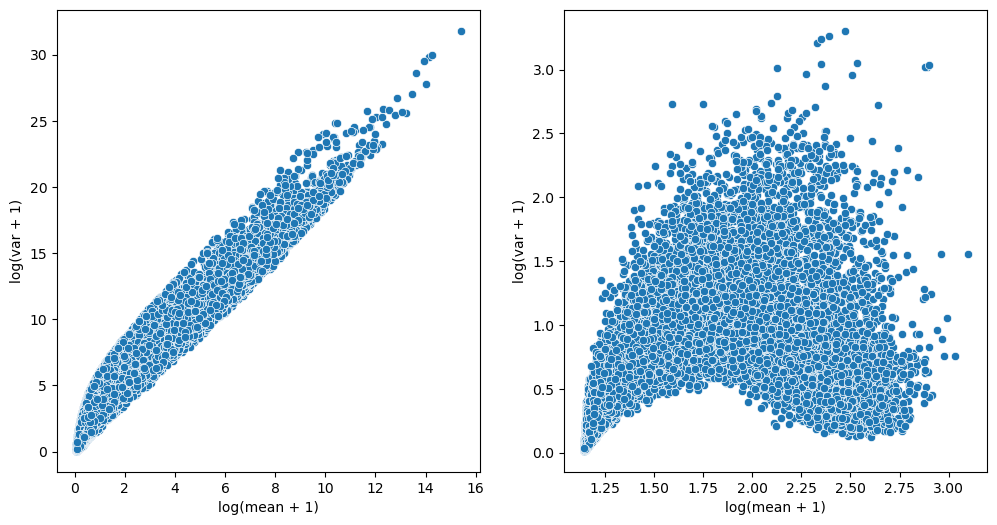

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(
    x = np.log1p(df.mean(axis=0)),
    y = np.log1p(df.var(axis=0)),
    ax = axes[0]
)
sns.scatterplot(
    x = np.log1p(df_vst.mean(axis=0)),
    y = np.log1p(df_vst.var(axis=0)),
    ax = axes[1]
)
axes[0].set(xlabel='log(mean + 1)', ylabel='log(var + 1)')
for ax in axes:
    ax.set(xlabel='log(mean + 1)', ylabel='log(var + 1)')

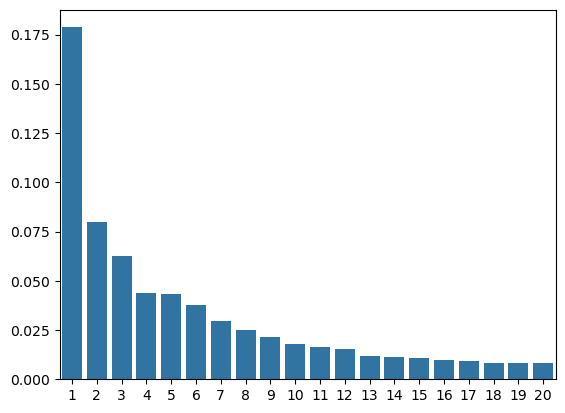

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_vst), index=df_vst.index, columns=[f'PC{i+1}' for i in range(N)])
sns.barplot(
    x = list(range(1, 21)),
    y = pca.explained_variance_ratio_[:20]
)
df_pca.to_csv('./rnaseq-pca.csv', sep=',')

<Axes: xlabel='PC1', ylabel='PC2'>

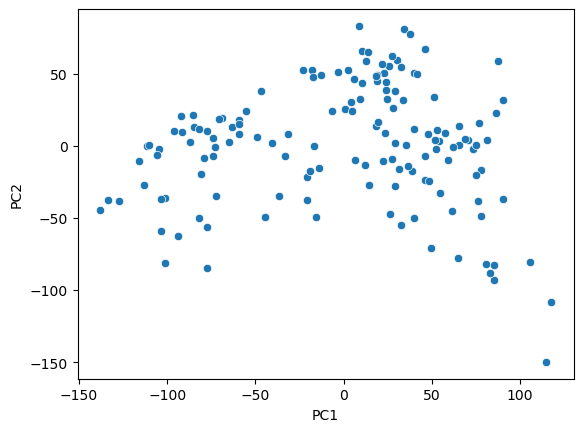

In [33]:
sns.scatterplot(
    x = df_pca['PC1'],
    y = df_pca['PC2']
)

/home/xht7mt/.conda/envs/sbds-hackathon-25/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: xlabel='UMAP1', ylabel='UMAP2'>

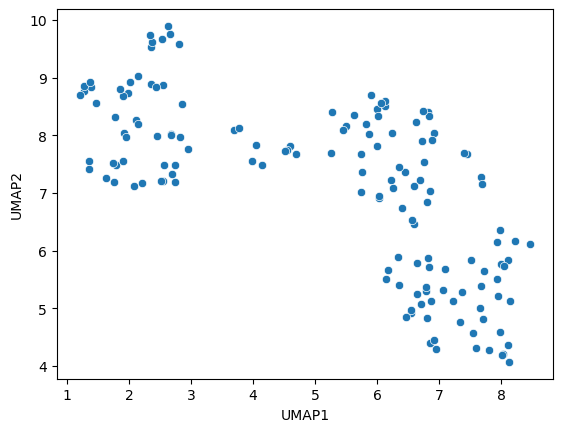

In [35]:
import umap

reducer = umap.UMAP(random_state=329)
df_umap = pd.DataFrame(reducer.fit_transform(df_vst), index=df_vst.index, columns=['UMAP1', 'UMAP2'])
df_umap.to_csv('./rnaseq-umap.csv', sep=',')

sns.scatterplot(
    x = df_umap['UMAP1'],
    y = df_umap['UMAP2']
)

For k = 2 The average silhouette_score is : 0.12932524211798577
For k = 3 The average silhouette_score is : 0.11785016909634671
For k = 4 The average silhouette_score is : 0.07089654993259044
For k = 5 The average silhouette_score is : 0.054470665551923085


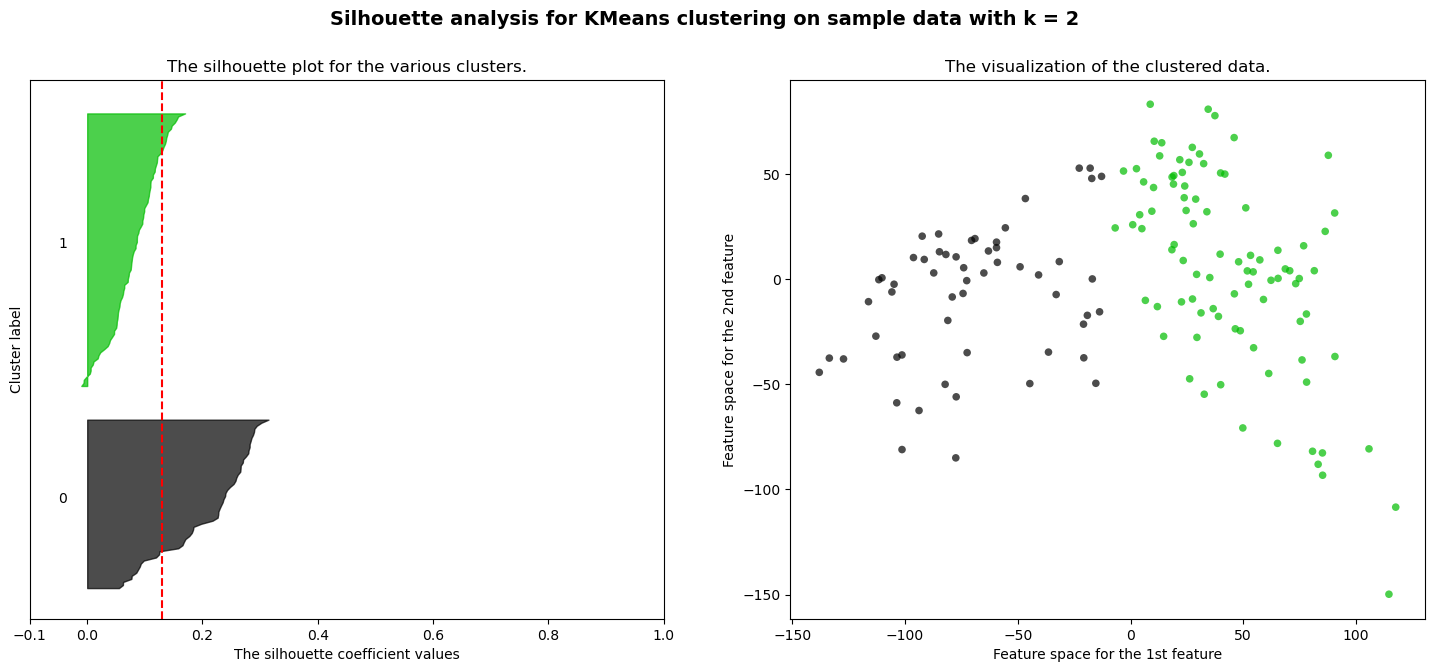

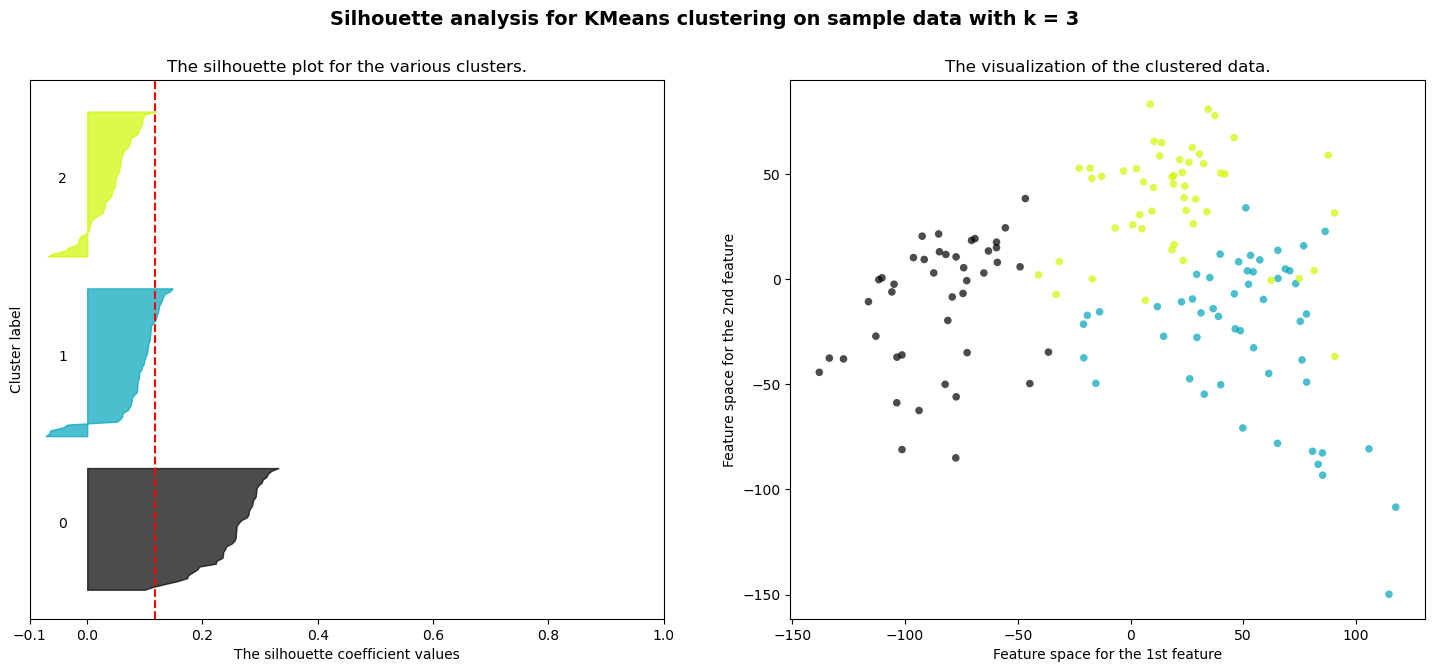

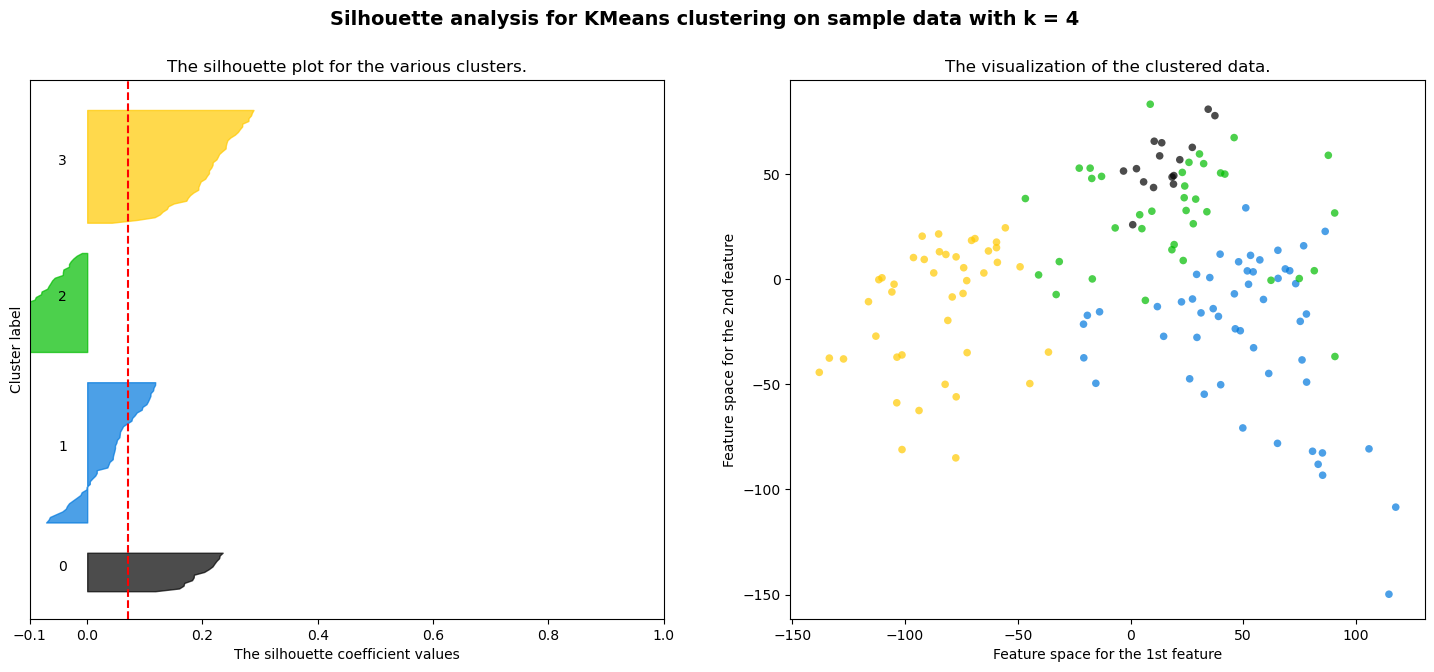

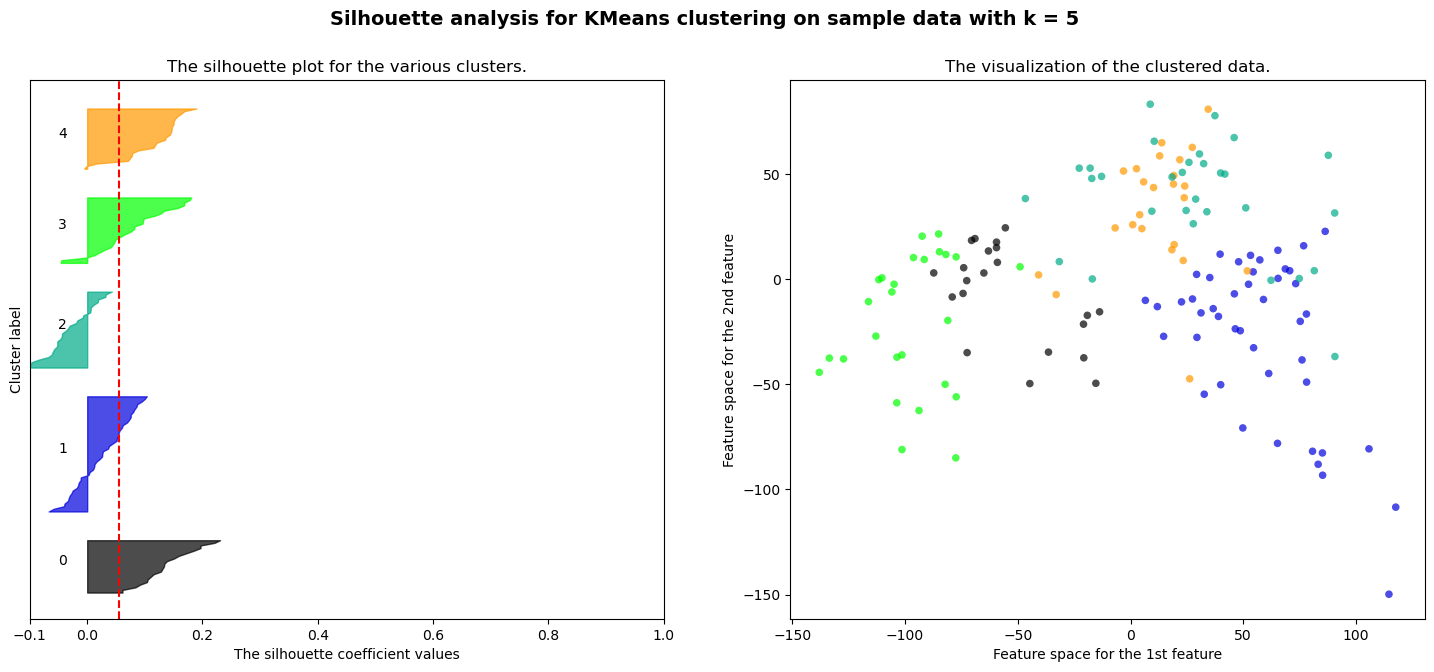

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

clusters = dict()
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=329).fit(df_vst)
    clusters[k] = kmeans.labels_
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_vst) + (k+1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_vst, clusters[k])
    print(
        "For k =",
        k,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_vst, clusters[k])

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters[k] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(clusters[k].astype(float) / k)
    ax2.scatter(
        df_pca['PC1'], df_pca['PC2'], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with k = %d"
        % k,
        fontsize=14,
        fontweight="bold",
    )
    

In [43]:
diagnosis = pd.read_csv('./cleaned_clinical_data_csvs/diagnosis_v2.csv').set_index('AvatarKey')
diagnosis = diagnosis.join(df_pca[['PC1', 'PC2']])
diagnosis

,AgeAtFirstContact,AgeAtDiagnosis,HistologyCode,Histology,CurrentlySeenForPrimaryOrRecurr,PC1,PC2
AvatarKey,,,,,,,
A006690,59.556,50.512,9823/3,Chronic lymphocytic leukemia/small lymphocytic...,Progressive Disease,-81.014875,-19.700978
A006745,76.866,76.855,9867/3,Acute myelomonocytic leukemia,Primary Diagnosis,37.427344,77.639377
A006746,79.899,79.899,9895/3,Acute myeloid leukemia,Primary Diagnosis,35.156960,0.674535
A006747,39.871,38.753,9861/3,Acute myeloid leukemia,Progressive Disease,21.851811,56.697489
A006748,52.581,52.581,9861/3,Acute myeloid leukemia,Primary Diagnosis,18.349839,13.913689
...,...,...,...,...,...,...,...
A049247,79.921,79.921,9861/3,Acute myeloid leukemia,Primary Diagnosis,114.594058,-149.846015
A049248,73.082,73.082,9861/3,Acute myeloid leukemia,Primary Diagnosis,85.190093,-93.276540
A049250,60.463,60.463,9861/3,Acute myeloid leukemia,Primary Diagnosis,26.231311,-47.444513


<Axes: xlabel='PC1', ylabel='PC2'>

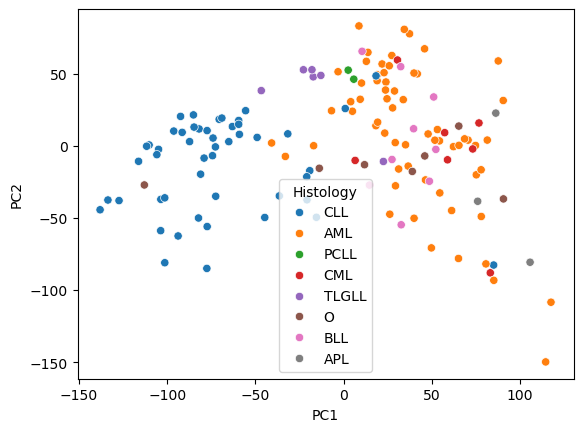

In [46]:
def abbrev(s):
    return ''.join(word[0].upper() for word in s.split('/')[0].split(' '))

sns.scatterplot(
    data = diagnosis,
    x = 'PC1',
    y = 'PC2',
    hue = diagnosis['Histology'].map(abbrev)
)

,ENSG00000000419.12,ENSG00000000971.15,ENSG00000001167.14,ENSG00000001497.16,ENSG00000001626.15,ENSG00000001631.15,ENSG00000002079.14,ENSG00000002330.13,ENSG00000002549.12,ENSG00000002726.20,...,ENSG00000285970.1,ENSG00000285972.1,ENSG00000285974.1,ENSG00000285975.1,ENSG00000285978.1,ENSG00000285979.1,ENSG00000285990.1,ENSG00000285991.1,ENSG00000285992.1,ENSG00000285994.1
AvatarKey,,,,,,,,,,,,,,,,,,,,,
A039970,10.805558,8.771152,9.961086,11.144277,2.117353,10.055138,3.034812,5.908880,12.362681,3.394680,...,3.034812,2.117353,2.117353,2.117353,2.117353,2.771464,2.117353,2.117353,2.117353,2.117353
A039977,10.387572,7.880971,10.464894,11.146812,3.811688,9.680863,3.988501,6.316168,13.267841,3.000213,...,2.117353,2.117353,2.117353,2.117353,2.117353,3.190658,2.117353,2.117353,2.117353,2.117353
A049227,9.049552,11.574798,8.982664,12.711982,2.117353,8.539662,2.117353,6.659381,11.887116,2.117353,...,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353
A040107,9.849772,8.096256,10.178836,12.323316,2.117353,10.955523,2.117353,6.297227,12.030044,6.270618,...,4.140755,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353
A028331,10.236312,8.882651,9.352316,10.942119,4.998085,11.552514,2.816061,6.350675,11.367705,4.820076,...,3.096272,2.117353,3.477527,2.117353,2.117353,5.335662,2.117353,4.336221,2.117353,5.408752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A039966,10.665683,8.625195,10.354214,11.536131,2.117353,8.955871,3.202928,6.023153,11.244640,5.136634,...,3.780879,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353
A008273,11.510540,11.100712,10.104007,11.581210,2.117353,10.839927,3.578182,6.597701,11.324563,6.997367,...,3.035082,2.117353,2.117353,3.806332,2.117353,3.035082,2.117353,2.117353,2.117353,2.117353
A049245,10.446127,8.216688,9.847779,11.500546,2.117353,10.000982,2.117353,5.504337,11.263391,4.284214,...,2.117353,3.033942,2.117353,2.117353,2.117353,3.393503,2.117353,2.117353,2.117353,2.770834


<Axes: >

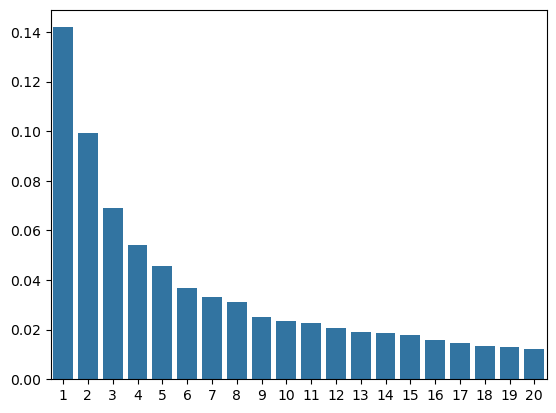

In [70]:
df_vst_hist = df_vst.join(diagnosis['Histology'].map(abbrev))
df_aml = df_vst_hist[df_vst_hist['Histology'] == 'AML'].drop(columns='Histology')
display(df_aml)

df_aml_pca = pd.DataFrame(pca.fit_transform(df_aml), index=df_aml.index, columns=[f'PC{i+1}' for i in range(df_aml.shape[0])])
sns.barplot(
    x = list(range(1, 21)),
    y = pca.explained_variance_ratio_[:20]
) 

<Axes: xlabel='PC1', ylabel='PC2'>

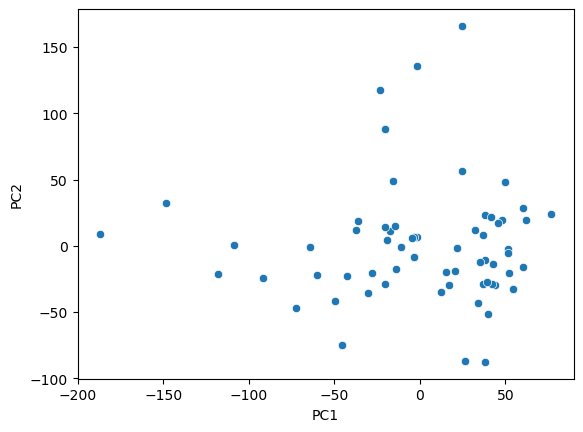

In [64]:
sns.scatterplot(
    data = df_aml_pca,
    x = 'PC1',
    y = 'PC2'
)

For k = 2 The average silhouette_score is : 0.08225256530301425
For k = 3 The average silhouette_score is : 0.07323912474026939
For k = 4 The average silhouette_score is : 0.05340940584332621
For k = 5 The average silhouette_score is : 0.05508542977621443


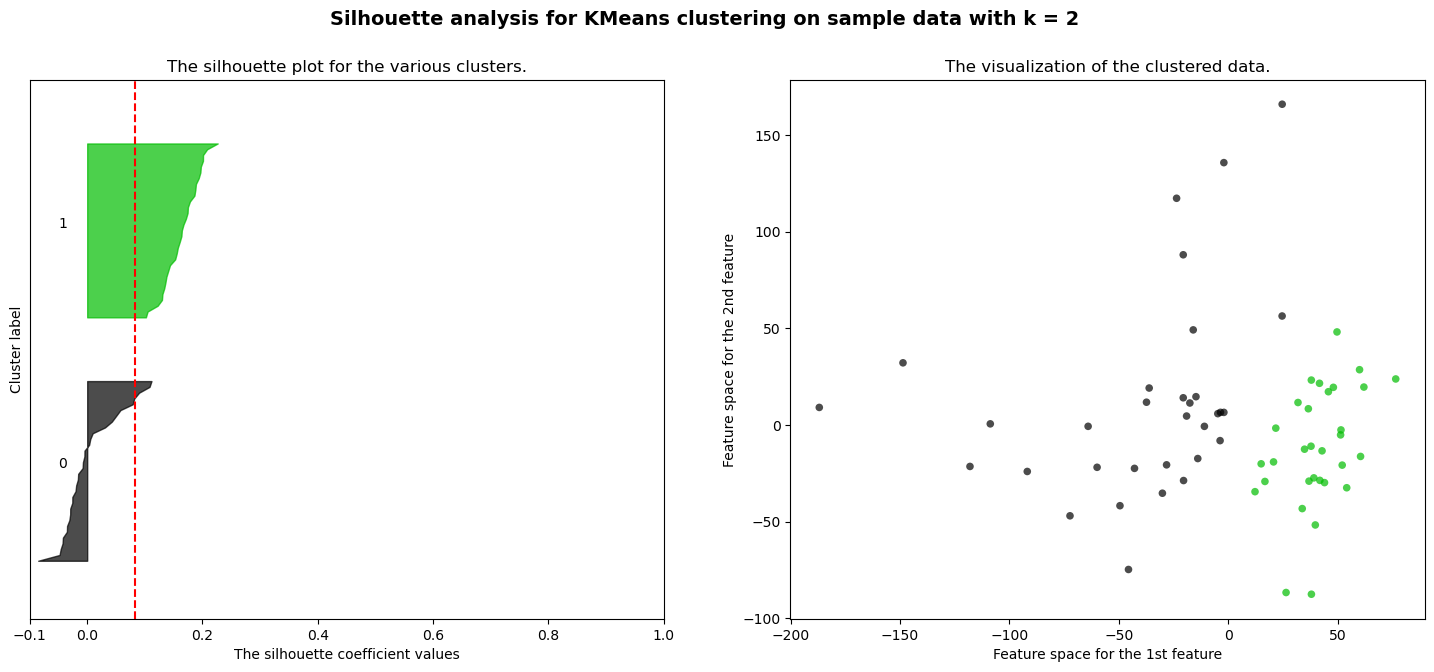

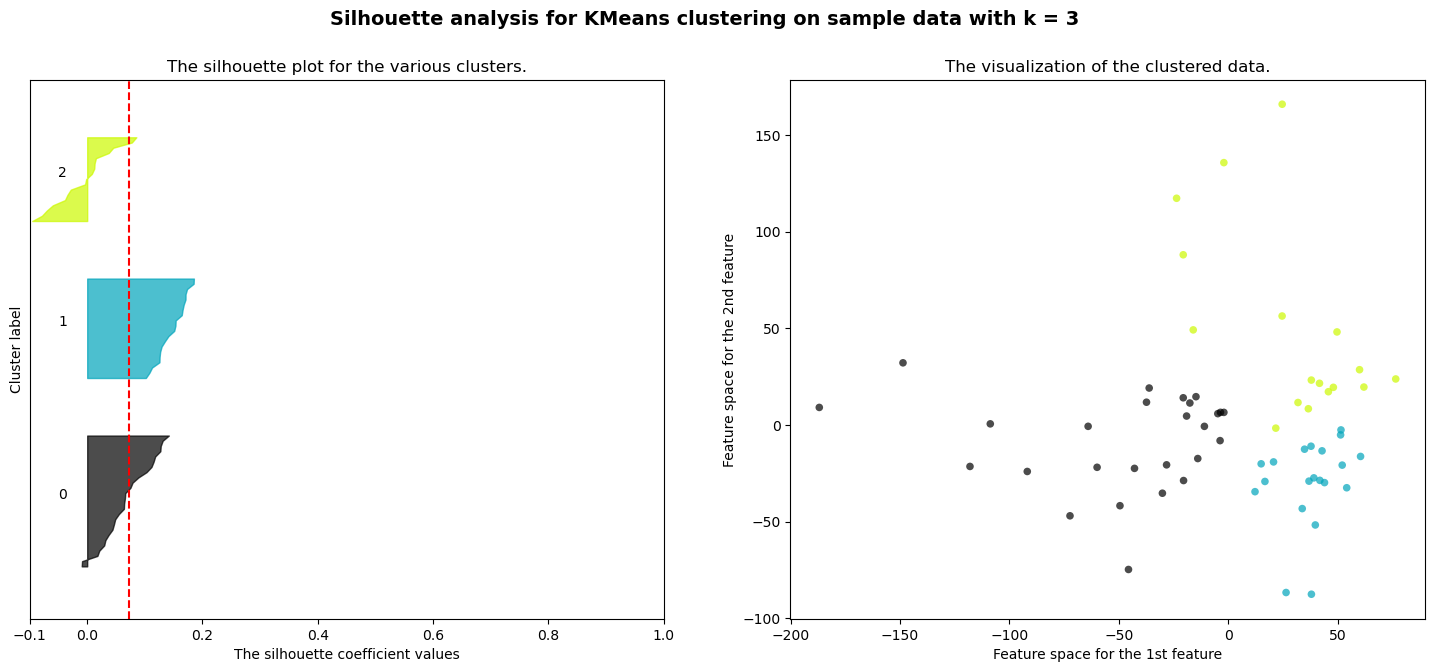

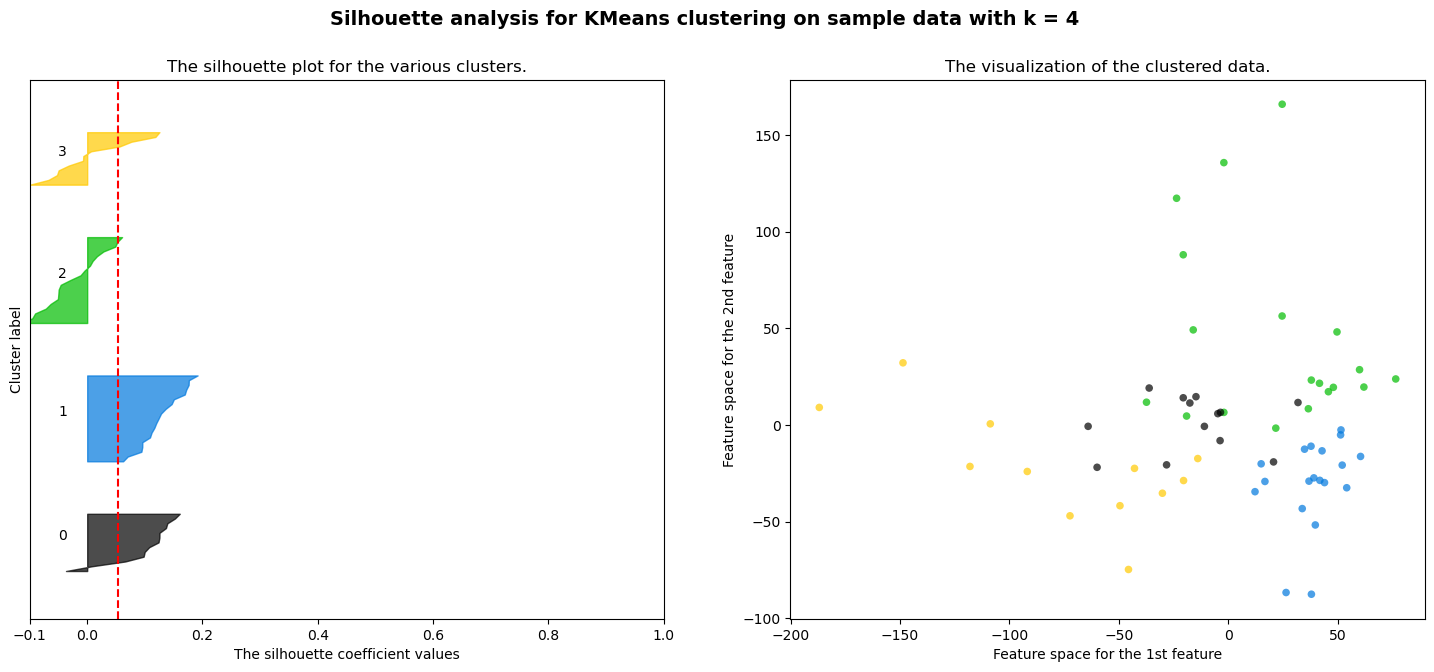

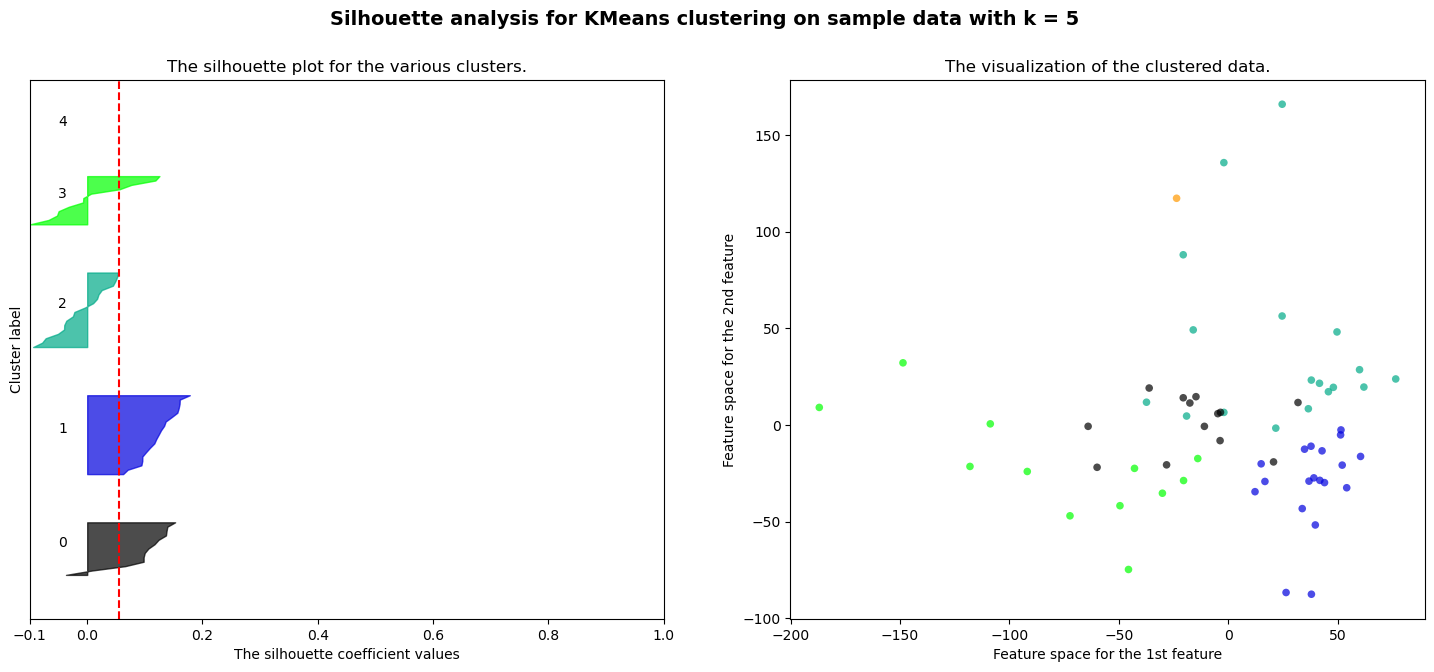

In [81]:
clusters = dict()
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=329).fit(df_aml)
    clusters[k] = kmeans.labels_
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_aml) + (k+1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_aml, clusters[k])
    print(
        "For k =",
        k,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_aml, clusters[k])

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters[k] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(clusters[k].astype(float) / k)
    ax2.scatter(
        df_aml_pca['PC1'], df_aml_pca['PC2'], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with k = %d"
        % k,
        fontsize=14,
        fontweight="bold",
    )
    

In [72]:
aml_clusters = pd.Series(clusters[2], index=df_aml.index, name='Cluster').map({0: 'AML1', 1: 'AML2'})
aml_clusters

AvatarKey
A039970    AML1
A039977    AML1
A049227    AML1
A040107    AML1
A028331    AML2
           ... 
A039966    AML1
A008273    AML2
A049245    AML1
A049250    AML1
A039962    AML1
Name: Cluster, Length: 63, dtype: object

/home/xht7mt/.conda/envs/sbds-hackathon-25/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: xlabel='UMAP1', ylabel='UMAP2'>

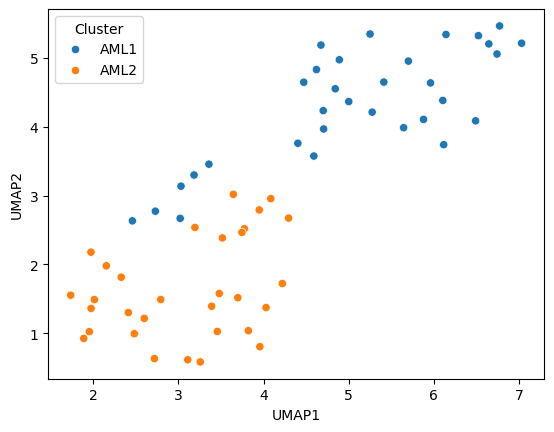

In [84]:
reducer = umap.UMAP(random_state=329)
df_aml_umap = pd.DataFrame(reducer.fit_transform(df_aml), index=df_aml.index, columns=['UMAP1', 'UMAP2'])

sns.scatterplot(
    x = df_aml_umap['UMAP1'],
    y = df_aml_umap['UMAP2'],
    hue = aml_clusters,
    hue_order = ['AML1', 'AML2']
)

,ENSG00000000419.12,ENSG00000000971.15,ENSG00000001167.14,ENSG00000001497.16,ENSG00000001626.15,ENSG00000001631.15,ENSG00000002079.14,ENSG00000002330.13,ENSG00000002549.12,ENSG00000002726.20,...,ENSG00000285970.1,ENSG00000285972.1,ENSG00000285974.1,ENSG00000285975.1,ENSG00000285978.1,ENSG00000285979.1,ENSG00000285990.1,ENSG00000285991.1,ENSG00000285992.1,ENSG00000285994.1
AvatarKey,,,,,,,,,,,,,,,,,,,,,
A039973,11.089903,7.008210,9.994094,11.219257,2.117353,10.420491,2.117353,6.681884,11.102153,2.117353,...,2.117353,2.117353,2.117353,6.136859,2.117353,2.117353,2.117353,2.117353,2.117353,2.117353
A040104,10.460972,7.484344,10.618720,11.595889,2.117353,9.980120,2.117353,5.537376,10.913353,2.117353,...,2.117353,2.117353,2.117353,2.117353,2.117353,2.889344,2.117353,2.117353,2.117353,2.117353
A029218,10.260646,7.061766,9.311088,11.843967,3.187981,10.568707,2.117353,7.564479,9.029693,4.292650,...,4.840775,2.117353,2.117353,2.117353,2.117353,5.077156,2.117353,2.882880,2.117353,4.386056
A029229,10.763184,9.395029,9.361672,11.208889,3.160133,10.464601,2.117353,6.416064,11.697955,3.919057,...,2.862554,3.025163,2.117353,2.117353,2.117353,4.420245,2.117353,3.025163,2.117353,3.789344
A030206,11.389752,7.092224,9.586015,11.250994,2.906922,10.965892,2.576975,6.221123,10.570738,4.367779,...,3.381987,2.117353,2.117353,2.117353,2.117353,4.334903,2.764666,3.904058,2.117353,3.520947
A039958,10.621838,6.859084,9.868636,11.533867,2.117353,10.790232,4.140661,6.665040,11.574108,3.036912,...,2.117353,2.117353,2.117353,2.117353,2.117353,3.537949,3.036912,2.117353,2.117353,2.117353
A032145,10.797318,10.161373,9.926418,10.613367,3.311845,10.671613,2.117353,7.048412,12.312707,6.209703,...,3.633169,2.117353,2.117353,2.117353,2.117353,3.633169,2.117353,2.117353,2.117353,3.101552
A032148,11.198684,7.274358,9.722444,11.134611,4.132473,10.354796,2.117353,7.216595,11.257108,3.340710,...,2.117353,2.117353,2.117353,2.117353,2.117353,3.668626,2.117353,2.117353,2.117353,2.837510
A029217,12.371441,6.873393,9.109273,11.450184,4.047163,10.663937,2.989615,5.295125,10.060899,2.117353,...,3.694465,2.117353,2.738758,2.117353,2.117353,4.600019,2.738758,3.177953,2.117353,3.333467


<Axes: >

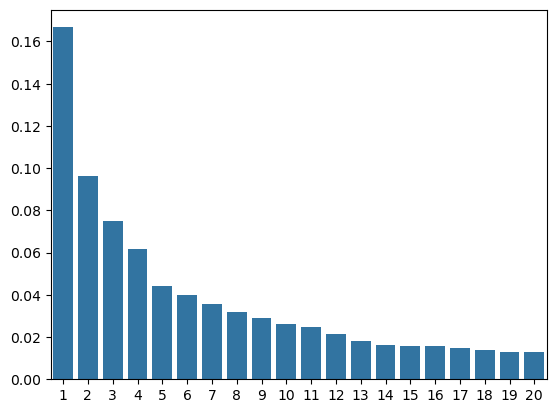

In [65]:
df_cll = df_vst_hist[df_vst_hist['Histology'] == 'CLL'].drop(columns='Histology')
display(df_cll)

df_cll_pca = pd.DataFrame(pca.fit_transform(df_cll), index=df_cll.index, columns=[f'PC{i+1}' for i in range(df_cll.shape[0])])
sns.barplot(
    x = list(range(1, 21)),
    y = pca.explained_variance_ratio_[:20]
)

<Axes: xlabel='PC1', ylabel='PC2'>

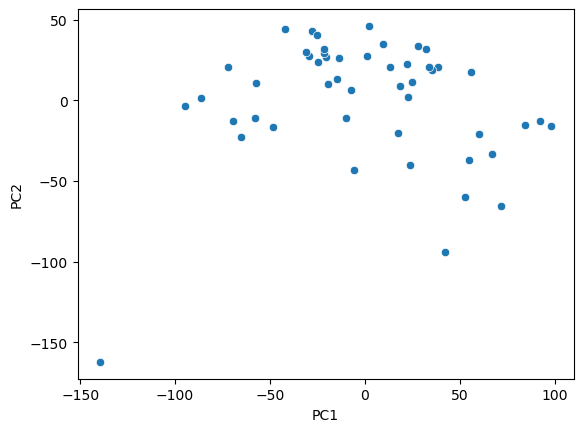

In [66]:
sns.scatterplot(
    data = df_cll_pca,
    x = 'PC1',
    y = 'PC2'
)

For k = 2 The average silhouette_score is : 0.05401318180051808
For k = 3 The average silhouette_score is : 0.07382995664851667
For k = 4 The average silhouette_score is : 0.07096833806160356
For k = 5 The average silhouette_score is : 0.04957022162068104


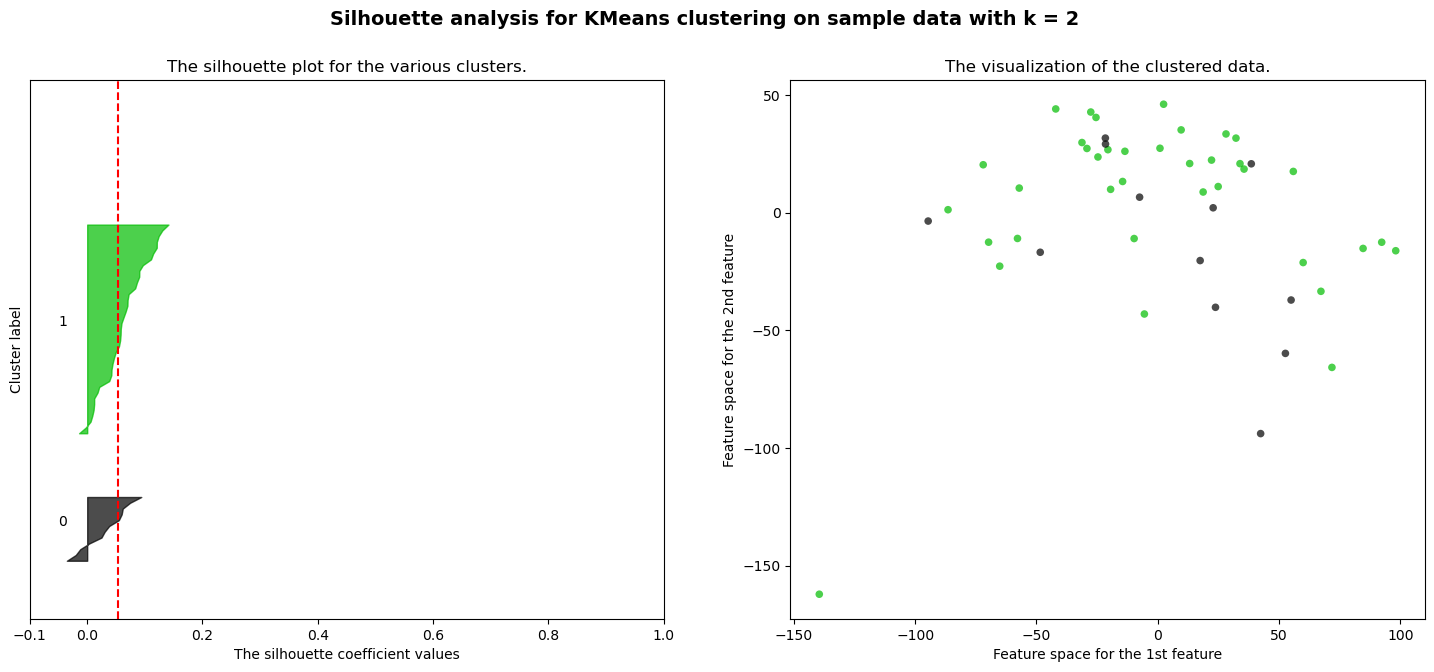

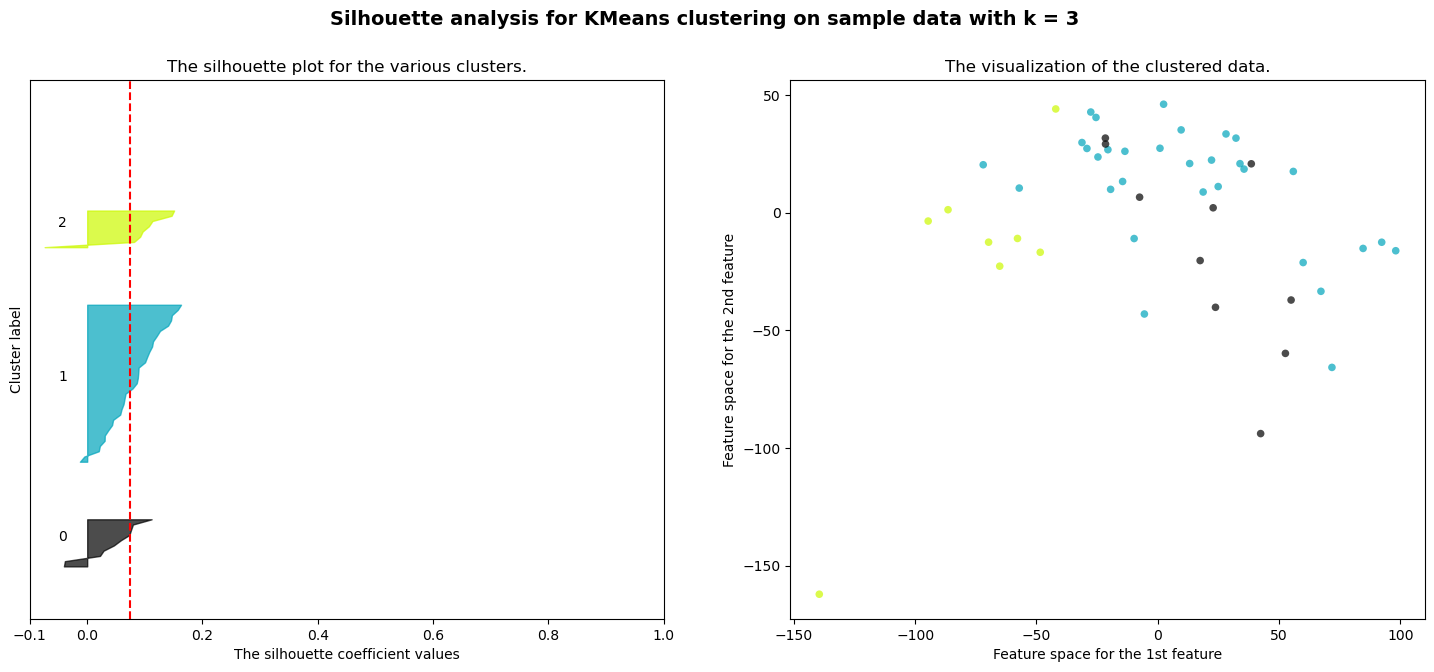

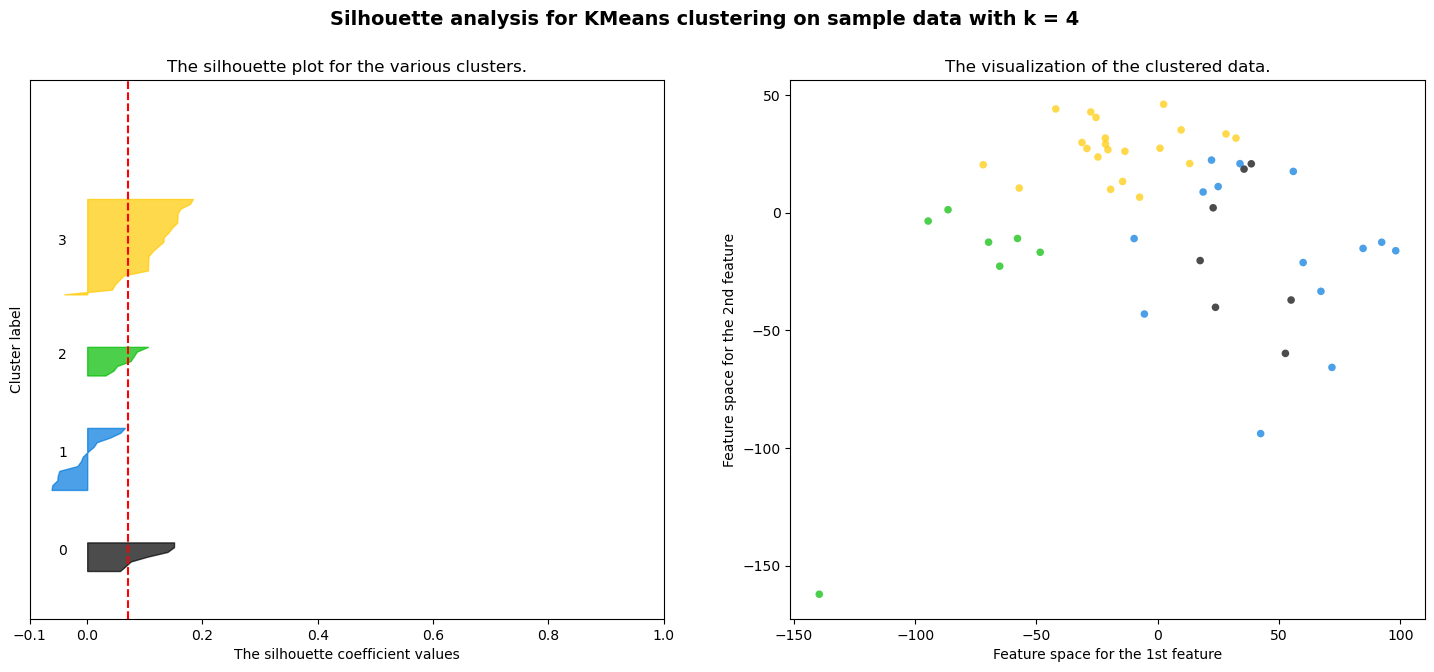

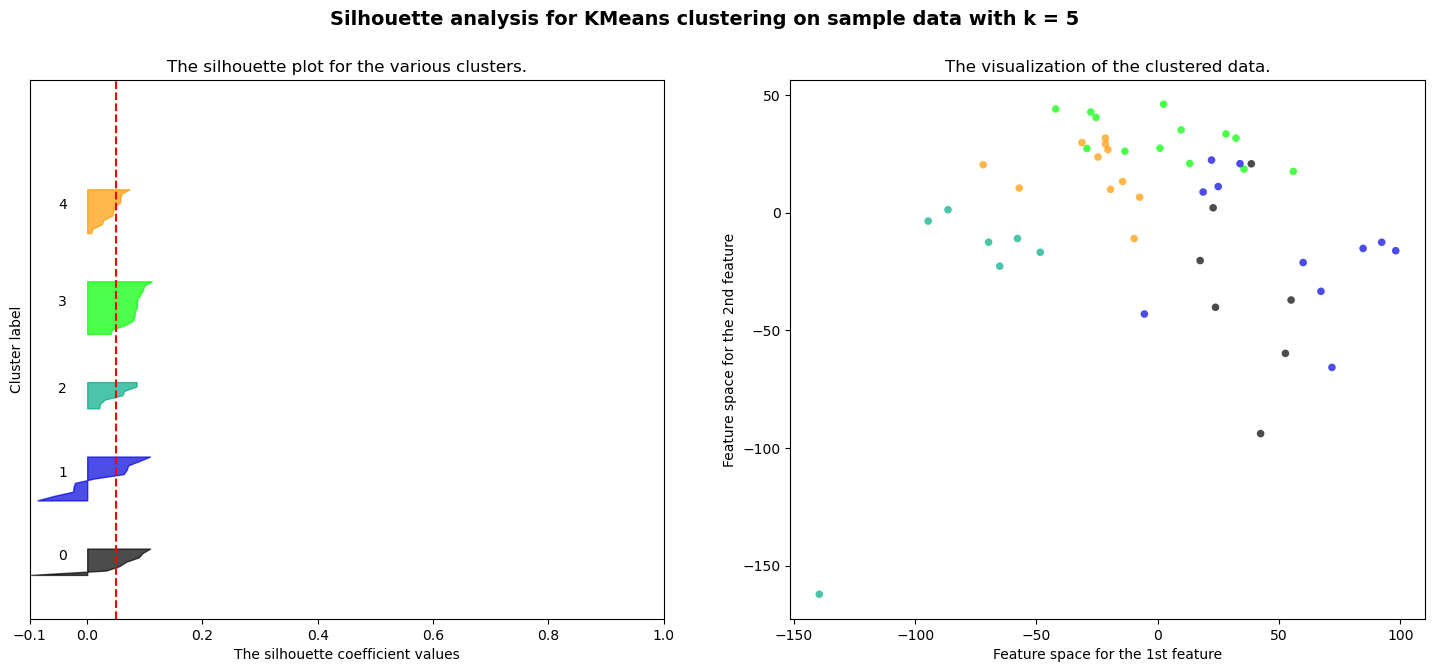

In [73]:
clusters = dict()
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=329).fit(df_cll)
    clusters[k] = kmeans.labels_
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_aml) + (k+1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_cll, clusters[k])
    print(
        "For k =",
        k,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_cll, clusters[k])

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters[k] == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(clusters[k].astype(float) / k)
    ax2.scatter(
        df_cll_pca['PC1'], df_cll_pca['PC2'], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with k = %d"
        % k,
        fontsize=14,
        fontweight="bold",
    )
    

In [74]:
cll_clusters = pd.Series(clusters[3], index=df_cll.index, name='Cluster').map({0: 'CLL1', 1: 'CLL2', 2: 'CLL3'})
cll_clusters

AvatarKey
A039973    CLL3
A040104    CLL3
A029218    CLL1
A029229    CLL2
A030206    CLL2
A039958    CLL3
A032145    CLL2
A032148    CLL2
A029217    CLL1
A029219    CLL2
A029220    CLL2
A029221    CLL2
A029222    CLL2
A029227    CLL2
A030205    CLL2
A030207    CLL2
A030988    CLL2
A028340    CLL2
A035447    CLL1
A008288    CLL2
A028334    CLL1
A029228    CLL2
A029224    CLL2
A033918    CLL2
A028335    CLL2
A039972    CLL3
A030997    CLL1
A032147    CLL1
A032154    CLL1
A030210    CLL2
A008287    CLL2
A008289    CLL2
A029215    CLL1
A030982    CLL2
A032139    CLL1
A030989    CLL1
A006690    CLL2
A030213    CLL2
A028333    CLL2
A039971    CLL3
A033915    CLL2
A039959    CLL3
A008277    CLL2
A029214    CLL2
A032137    CLL2
A032143    CLL2
A010844    CLL2
A010853    CLL3
A040093    CLL3
Name: Cluster, dtype: object

/home/xht7mt/.conda/envs/sbds-hackathon-25/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: xlabel='UMAP1', ylabel='UMAP2'>

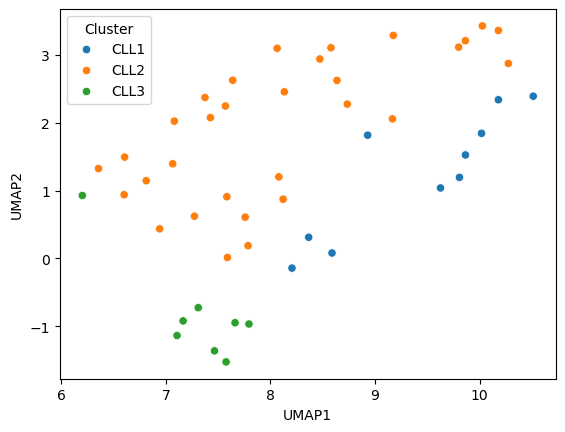

In [83]:
reducer = umap.UMAP(random_state=329)
df_cll_umap = pd.DataFrame(reducer.fit_transform(df_cll), index=df_cll.index, columns=['UMAP1', 'UMAP2'])

sns.scatterplot(
    x = df_cll_umap['UMAP1'],
    y = df_cll_umap['UMAP2'],
    hue = cll_clusters,
    hue_order = ['CLL1', 'CLL2', 'CLL3']
)

In [131]:
aml_cll_clusters = pd.concat([aml_clusters, cll_clusters], axis=0)
aml_cll_clusters.to_csv('aml_cll_clusters.csv', sep=',')
aml_cll_clusters

AvatarKey
A039970    AML1
A039977    AML1
A049227    AML1
A040107    AML1
A028331    AML2
           ... 
A032137    CLL2
A032143    CLL2
A010844    CLL2
A010853    CLL3
A040093    CLL3
Name: Cluster, Length: 112, dtype: object

In [172]:
survival5 = pd.read_csv('./cleaned_clinical_data_csvs/five_year_survival.csv').set_index('AvatarKey')
survival3 = pd.read_csv('./cleaned_clinical_data_csvs/three_year_survival.csv').set_index('AvatarKey')
survival_duration = pd.read_csv('./cleaned_clinical_data_csvs/survival_duration.csv').set_index('AvatarKey')
first_line_response = pd.read_csv('./cleaned_clinical_data_csvs/responseToFirstLine.csv').set_index('AvatarKey')
num_rx = pd.read_csv('./cleaned_clinical_data_csvs/number_of_prescriptions.csv').set_index('AvatarKey')

outcomes = first_line_response.join([num_rx, survival5, survival3, survival_duration], how='outer')
outcomes

,FirstTrtResponse,NumberOfMedications,5_year_survival,3_year_survival,ObservedSurvivalDuration
AvatarKey,,,,,
A039958,0.0,5,NaN,NaN,2.121
A039959,0.0,1,NaN,NaN,2.148
A039961,0.0,1,NaN,Alive,3.510
A039962,0.0,4,Dead,Dead,NaN
A039971,0.0,3,NaN,NaN,2.551
...,...,...,...,...,...
A040111,NaN,3,Dead,Dead,NaN
A040112,NaN,4,Dead,Dead,NaN
A040113,NaN,1,Dead,Dead,NaN


<Axes: xlabel='PC1', ylabel='PC2'>

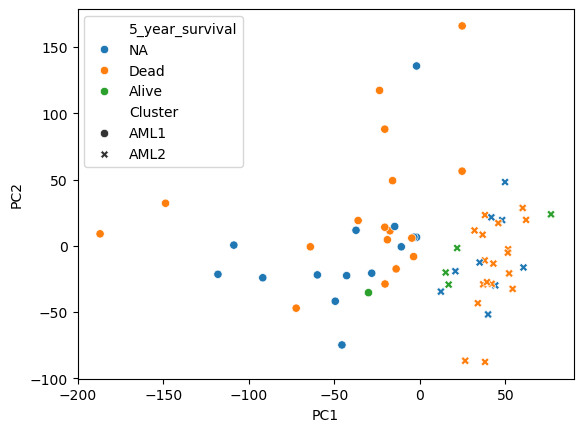

In [106]:
sns.scatterplot(
    data = aml_outcomes.fillna('NA'),
    x = 'PC1',
    y = 'PC2',
    hue = '5_year_survival',
    style = 'Cluster',
)

In [173]:
aml_outcomes = df_aml_pca[['PC1', 'PC2']].join(outcomes).join(aml_clusters)
aml_outcomes

,PC1,PC2,FirstTrtResponse,NumberOfMedications,5_year_survival,3_year_survival,ObservedSurvivalDuration,Cluster
AvatarKey,,,,,,,,
A039970,-1.952477,6.473823,NaN,8,NaN,NaN,NaN,AML1
A039977,-10.858604,-0.758127,1.0,9,NaN,NaN,1.560,AML1
A049227,-148.620472,32.121384,0.0,7,Dead,Dead,NaN,AML1
A040107,-36.096351,19.075133,0.0,4,Dead,Dead,NaN,AML1
A028331,38.050105,-87.630193,0.0,8,Dead,Dead,NaN,AML2
...,...,...,...,...,...,...,...,...
A039966,-59.906802,-21.944876,1.0,3,NaN,NaN,0.521,AML1
A008273,52.127400,-20.817357,0.0,7,Dead,Dead,NaN,AML2
A049245,-20.383598,-28.800716,0.0,10,Dead,Dead,NaN,AML1


<Axes: xlabel='Cluster', ylabel='ObservedSurvivalDuration'>

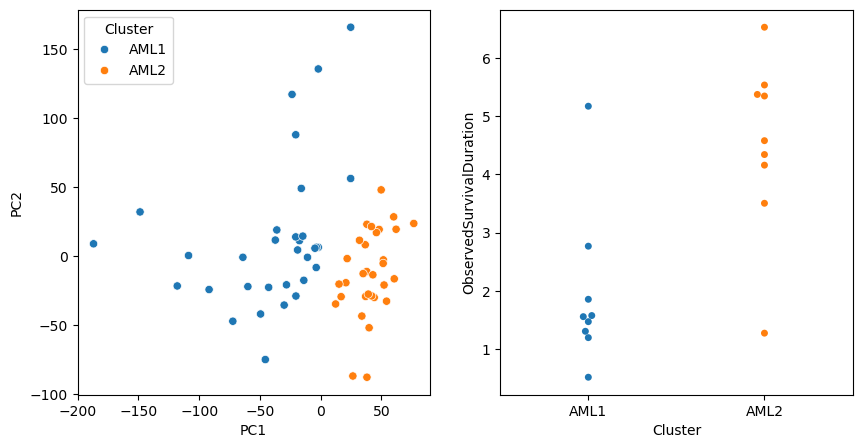

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(
    data = df_aml_pca.join(aml_clusters),
    x = 'PC1',
    y = 'PC2',
    hue = 'Cluster',
    ax = axes[0]
)
sns.swarmplot(
    data = aml_outcomes,
    x = 'Cluster',
    y = 'ObservedSurvivalDuration',
    hue = 'Cluster',
    ax = axes[1]
)

<Axes: xlabel='PC1', ylabel='PC2'>

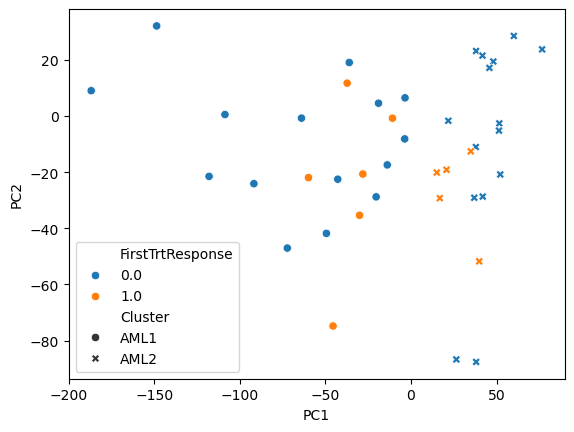

In [169]:
sns.scatterplot(
    data = aml_outcomes,
    x = 'PC1',
    y = 'PC2',
    hue = 'FirstTrtResponse',
    style = 'Cluster',
)

<Axes: xlabel='PC1', ylabel='PC2'>

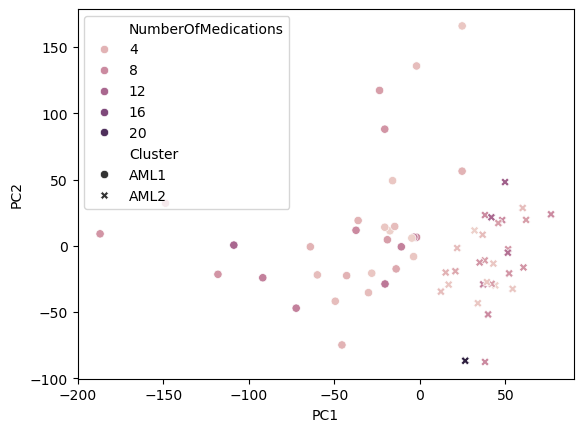

In [176]:
sns.scatterplot(
    data = aml_outcomes,
    x = 'PC1',
    y = 'PC2',
    style = 'Cluster',
    hue = 'NumberOfMedications',
)

In [179]:
aml_cat_response = pd.read_csv('/standard/BDShackathon/resources/AML_Category_Responses.csv').set_index('AvatarKey')
aml_cat_response

,Treatment_Class,Response
AvatarKey,,
A006746,Chemotherapy,NR
A006747,Chemotherapy,NR
A006748,Chemotherapy,NR
A006748,SCT,R
A008273,Chemotherapy,NR
...,...,...
A049250,Investigational Agent,R
A049252,Chemotherapy,NR
A049252,Supportive Agent,NR


In [203]:
treatment_classes = aml_cat_response['Treatment_Class'].sort_values().unique()
palette = dict(zip(treatment_classes, sns.color_palette('turbo', len(treatment_classes))))
palette['Others'] = '#aaaaaa'

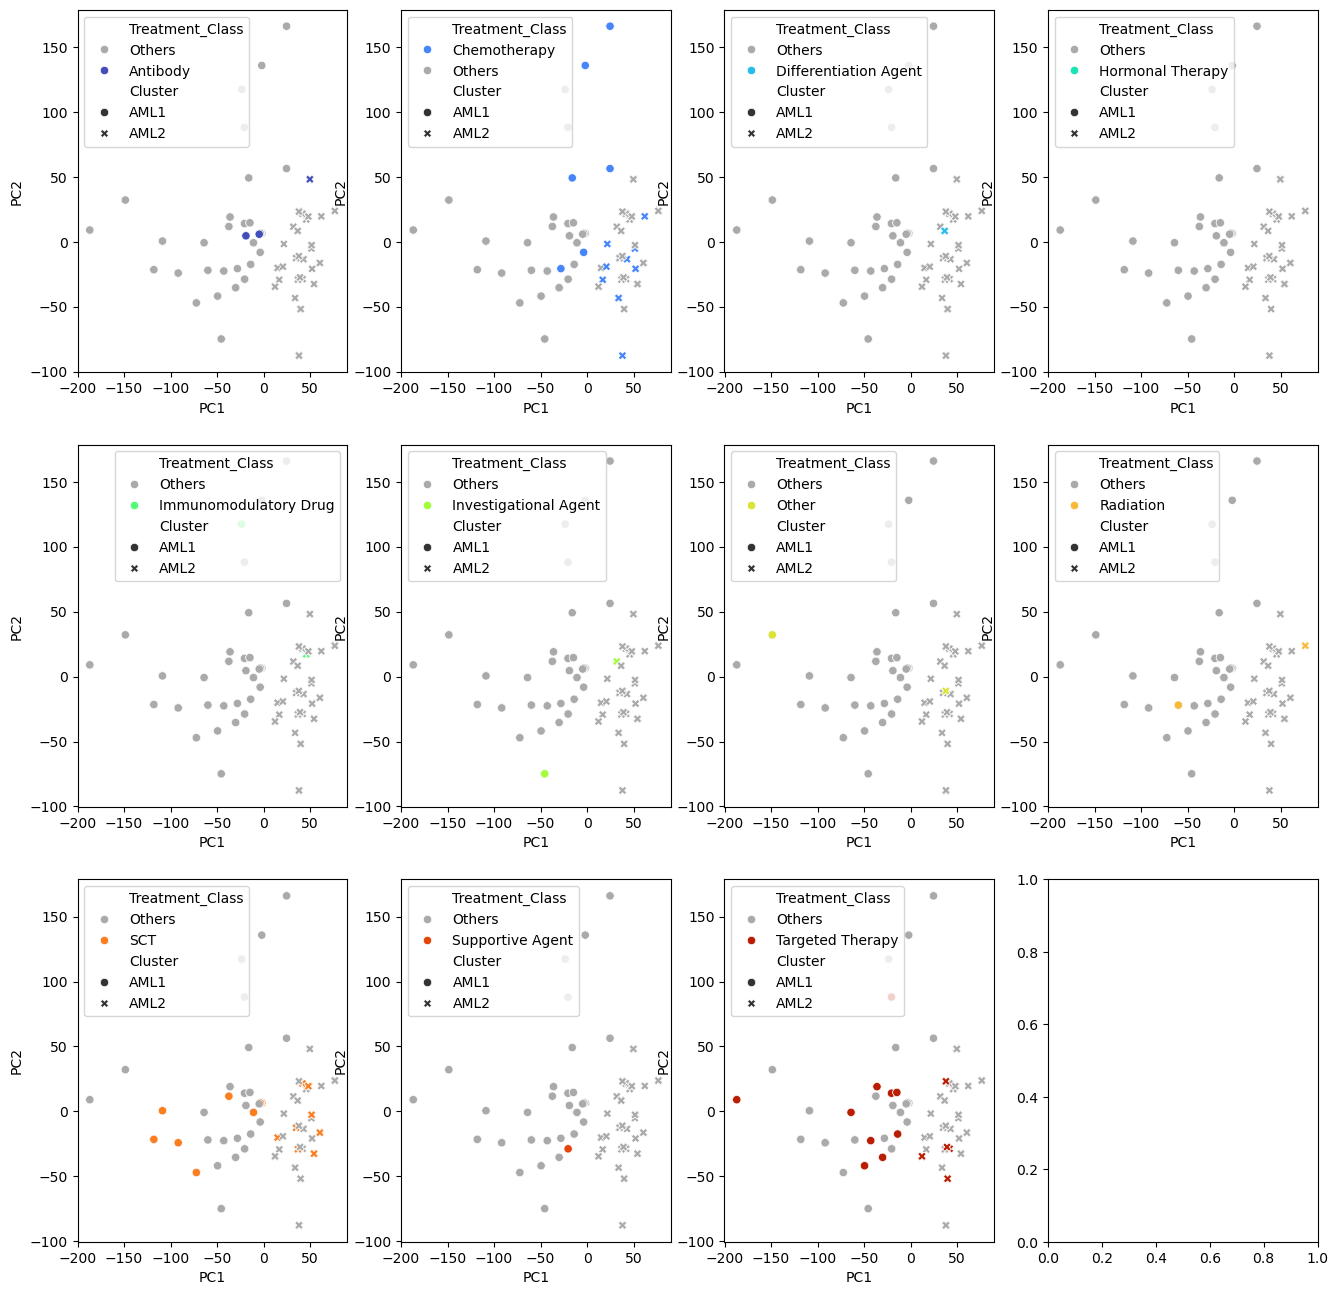

In [204]:
fig, axes = plt.subplots(3, 4, figsize=(16, 16))
for treatment_class, ax in zip(treatment_classes, axes.flatten()):
    data = aml_cat_response.join(df_aml_pca).join(aml_clusters)
    data['Treatment_Class'] = data['Treatment_Class'].map(lambda s: treatment_class if s == treatment_class else 'Others')
    sns.scatterplot(
        data = data,
        x = 'PC1',
        y = 'PC2',
        hue = 'Treatment_Class',
        palette = palette,
        style = 'Cluster',
        ax = ax
    )

In [174]:
cll_outcomes = df_cll_pca[['PC1', 'PC2']].join(outcomes).join(cll_clusters)
cll_outcomes

,PC1,PC2,FirstTrtResponse,NumberOfMedications,5_year_survival,3_year_survival,ObservedSurvivalDuration,Cluster
AvatarKey,,,,,,,,
A039973,-86.443092,1.221816,1.0,2,NaN,NaN,2.074,CLL3
A040104,-65.132935,-22.767477,NaN,1,NaN,NaN,2.508,CLL3
A029218,52.630521,-59.826386,NaN,1,NaN,Alive,4.991,CLL1
A029229,24.917608,11.060584,0.0,7,NaN,Alive,3.897,CLL2
A030206,32.252434,31.640674,0.0,6,NaN,Alive,4.224,CLL2
A039958,-57.811179,-10.989857,0.0,5,NaN,NaN,2.121,CLL3
A032145,-9.726701,-11.029515,1.0,1,NaN,Alive,4.624,CLL2
A032148,-19.418904,9.871757,NaN,1,NaN,Alive,4.714,CLL2
A029217,38.571684,20.731953,NaN,1,NaN,Alive,4.808,CLL1


<Axes: xlabel='PC1', ylabel='PC2'>

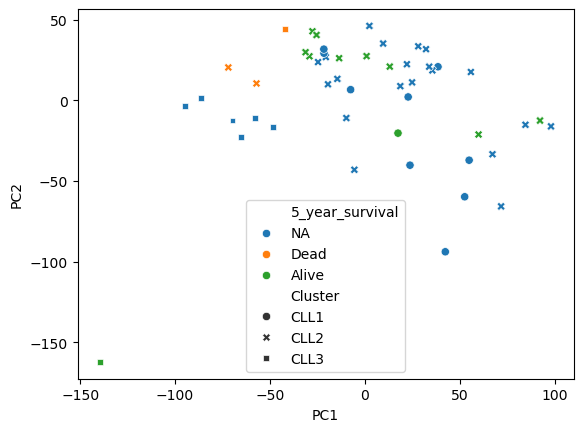

In [140]:
sns.scatterplot(
    data = cll_outcomes.fillna('NA'),
    x = 'PC1',
    y = 'PC2',
    hue = '5_year_survival',
    hue_order = ['NA', 'Dead', 'Alive'],
    style = 'Cluster',
    style_order = ['CLL1', 'CLL2', 'CLL3'],
)

<Axes: xlabel='Cluster', ylabel='ObservedSurvivalDuration'>

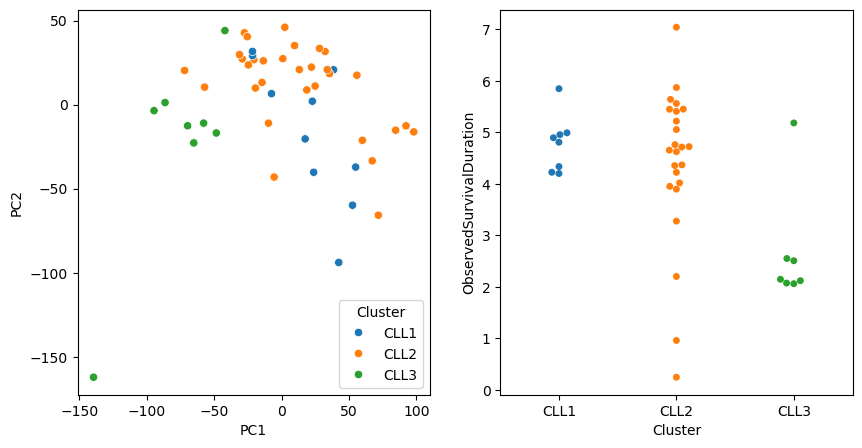

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(
    data = df_cll_pca.join(cll_clusters),
    x = 'PC1',
    y = 'PC2',
    hue = 'Cluster',
    hue_order = ['CLL1', 'CLL2', 'CLL3'],
    ax = axes[0]
)
sns.swarmplot(
    data = cll_outcomes,
    x = 'Cluster',
    order = ['CLL1', 'CLL2', 'CLL3'],
    y = 'ObservedSurvivalDuration',
    hue = 'Cluster',
    hue_order = ['CLL1', 'CLL2', 'CLL3'],
    ax = axes[1]
)

<Axes: xlabel='PC1', ylabel='PC2'>

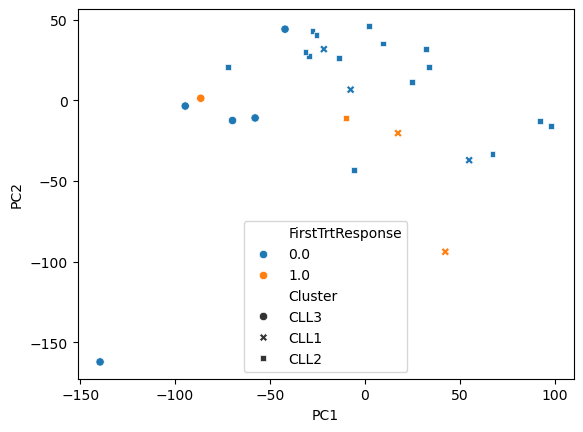

In [171]:
sns.scatterplot(
    data = cll_outcomes,
    x = 'PC1',
    y = 'PC2',
    hue = 'FirstTrtResponse',
    style = 'Cluster',
)

<Axes: xlabel='PC1', ylabel='PC2'>

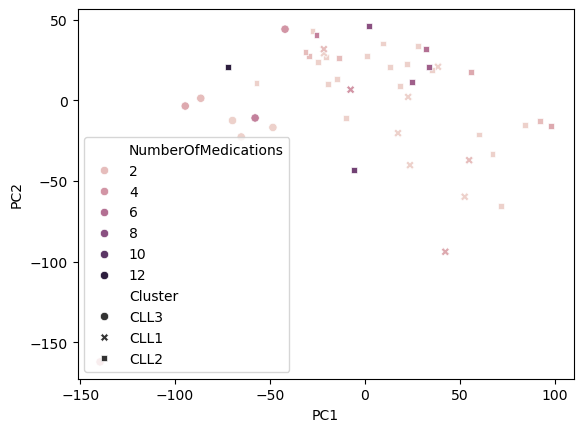

In [177]:
sns.scatterplot(
    data = cll_outcomes,
    x = 'PC1',
    y = 'PC2',
    style = 'Cluster',
    hue = 'NumberOfMedications',
)

In [144]:
cga = pd.read_csv('./cleaned_clinical_data_csvs/cytogenAbnorm.csv').set_index('AvatarKey')
cga

,t(8;21),t(9;22),inv(16),del 13q,FISH del 17p,del 17p,t(15;17) and variants,del(13q)/13q-,del(17p) / 17p-,del(20q)/20q-,del(6q)/6q-,FISH del 13q,FISH t(11;14),inv(3),t(11;14),t(12;21),t(8;14)
AvatarKey,,,,,,,,,,,,,,,,,
A040100,Positive,Negative,Positive,Negative,Positive,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Positive
A040095,Positive,Negative,Positive,Negative,Negative,Positive,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative
A040107,Positive,Negative,Positive,Negative,Positive,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative
A040113,Negative,Positive,Positive,Negative,Positive,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative
A040114,Positive,Negative,Positive,Negative,Negative,Negative,Positive,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative
A028337,Positive,Negative,Positive,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative
A028340,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Positive,Positive,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative
A030212,Negative,Positive,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Positive,Negative
A030995,Positive,Positive,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative


<Axes: xlabel='PC1', ylabel='PC2'>

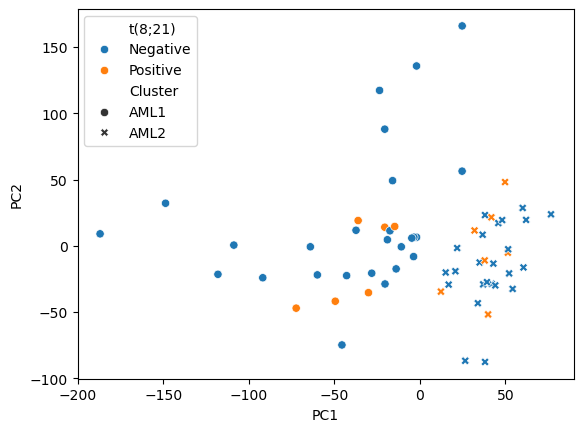

In [165]:
aml_pca_cga = df_aml_pca.join(cga, how='outer').join(aml_clusters)
for col in ['t(8;21)', 'inv(16)']:
    aml_pca_cga[col] = aml_pca_cga[col].fillna('Negative').astype(str)
sns.scatterplot(
    data = aml_pca_cga,
    x = 'PC1',
    y = 'PC2',
    hue = 't(8;21)',
    hue_order = ['Negative', 'Positive'],
    style = 'Cluster',
    style_order = ['AML1', 'AML2'],
)

<Axes: xlabel='PC1', ylabel='PC2'>

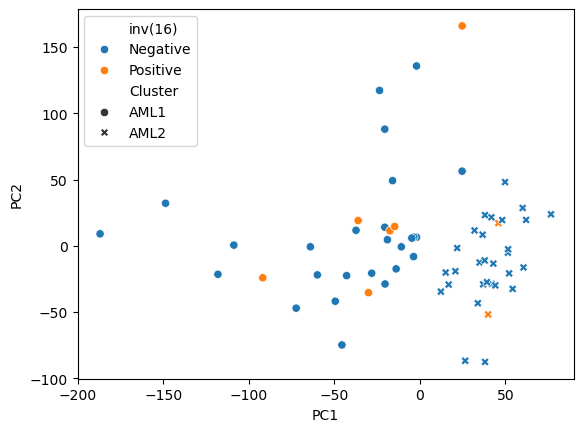

In [166]:
sns.scatterplot(
    data = aml_pca_cga,
    x = 'PC1',
    y = 'PC2',
    hue = 'inv(16)',
    hue_order = ['Negative', 'Positive'],
    style = 'Cluster',
    style_order = ['AML1', 'AML2'],
)

<Axes: xlabel='PC1', ylabel='PC2'>

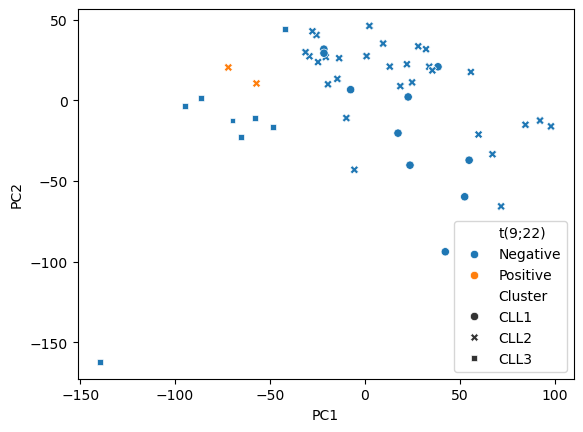

In [167]:
cll_pca_cga = df_cll_pca.join(cga, how='outer').join(cll_clusters)
cll_pca_cga['t(9;22)'] = cll_pca_cga['t(9;22)'].fillna('Negative').astype(str)
sns.scatterplot(
    data = cll_pca_cga,
    x = 'PC1',
    y = 'PC2',
    hue = 't(9;22)',
    hue_order = ['Negative', 'Positive'],
    style = 'Cluster',
    style_order = ['CLL1', 'CLL2', 'CLL3'],
)

In [122]:
pca.fit(df_aml)
aml_pca_loadings = pd.DataFrame(pca.components_, index=df_aml_pca.columns, columns=df_aml.columns)
aml_pc1_top_genes = aml_pca_loadings.T['PC1'].sort_values(ascending=False, key=np.abs).head(100)
aml_pc1_top_genes

ENSG00000265401.1    0.064166
ENSG00000258186.2   -0.057893
ENSG00000285283.1    0.051216
ENSG00000236439.4    0.050725
ENSG00000206760.1   -0.050705
                       ...   
ENSG00000225912.1    0.029787
ENSG00000285000.1    0.029588
ENSG00000230629.2    0.029515
ENSG00000250186.3   -0.029463
ENSG00000212664.5    0.029453
Name: PC1, Length: 100, dtype: float64

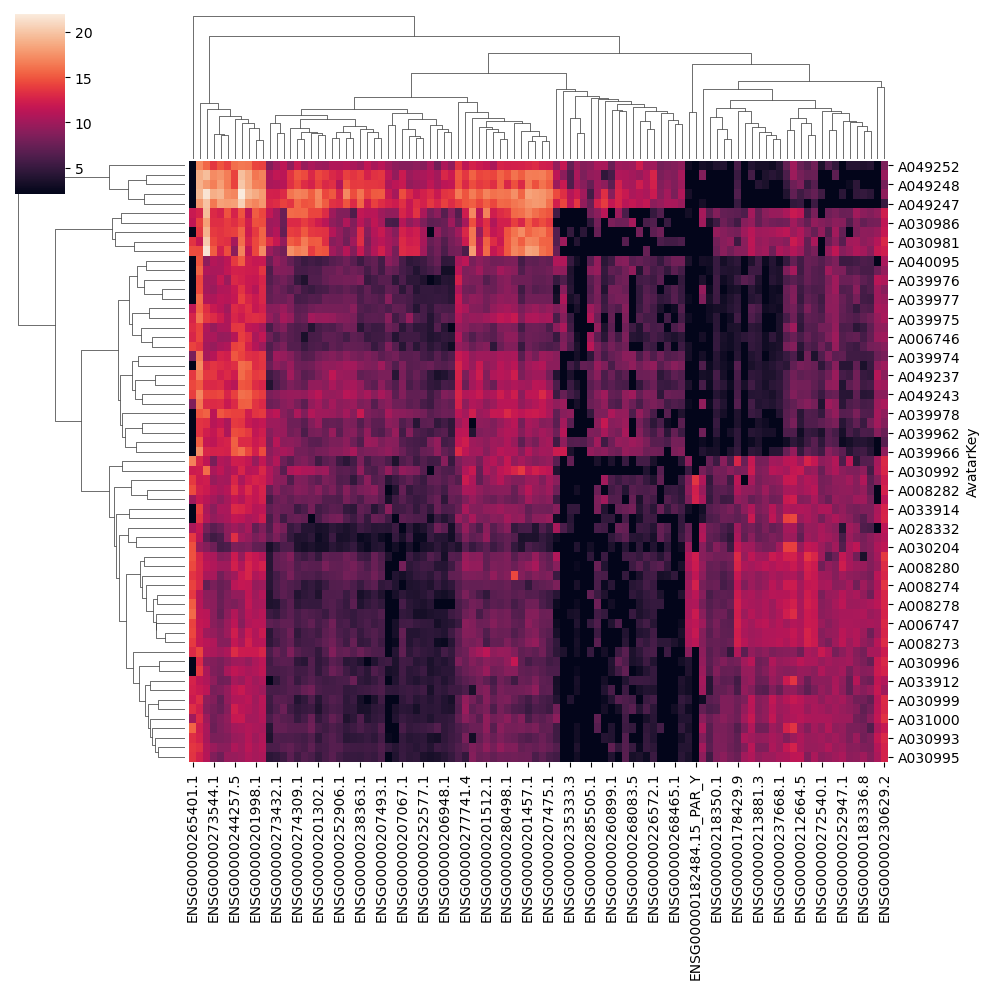

In [128]:
sns.clustermap(
    data = df_aml[aml_pc1_top_genes.index],
)